<a href="https://colab.research.google.com/github/hind-bridila/DDOS-attacks-classification/blob/main/SIEM_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## EDA

In [2]:
df=pd.read_csv("/content/Week_filtered.csv")

In [3]:
df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,115550790,31,33,318,38380,318,0,10.258065,57.114486,...,32.0,29534.636364,20922.826407,92617.0,22941.0,1.002161e+07,8209.967001,10025078.0,9998039.0,BENIGN
1,443,5292756,6,4,611,168,517,0,101.833333,204.305082,...,20.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,BENIGN
2,21,3,2,0,14,0,14,0,7.000000,9.899495,...,32.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,FTP-Patator
3,54045,41,1,1,2,6,2,2,2.000000,0.000000,...,24.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,PortScan
4,80,1023,2,0,0,0,0,0,0.000000,0.000000,...,32.0,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,DoS Hulk


In [4]:
# Supprimer les espaces avant les noms de colonnes
df.columns = df.columns.str.strip()

In [5]:
#Valeurs uniques dans la colonne cible de l'étiquette
df.loc[:,'Label'].unique()

array(['BENIGN', 'FTP-Patator', 'PortScan', 'DoS Hulk', 'DDoS',
       'SSH-Patator', 'DoS Slowhttptest', 'DoS GoldenEye',
       'Web Attack � XSS', 'DoS slowloris', 'Bot',
       'Web Attack � Brute Force', nan], dtype=object)

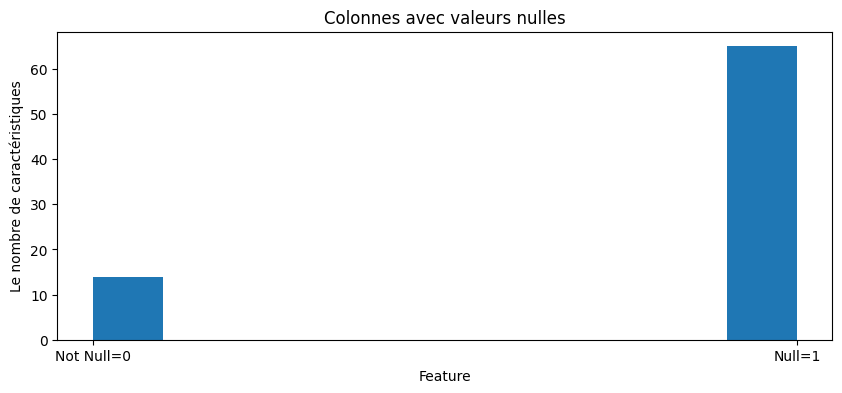

In [6]:
#Vérification des valeurs nulles dans l'ensemble de données.
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())
# Définir le titre et les étiquettes des axes
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Colonnes avec valeurs nulles')
plt.xlabel('Feature')
plt.ylabel('Le nombre de caractéristiques')

# Show the plot
plt.show()

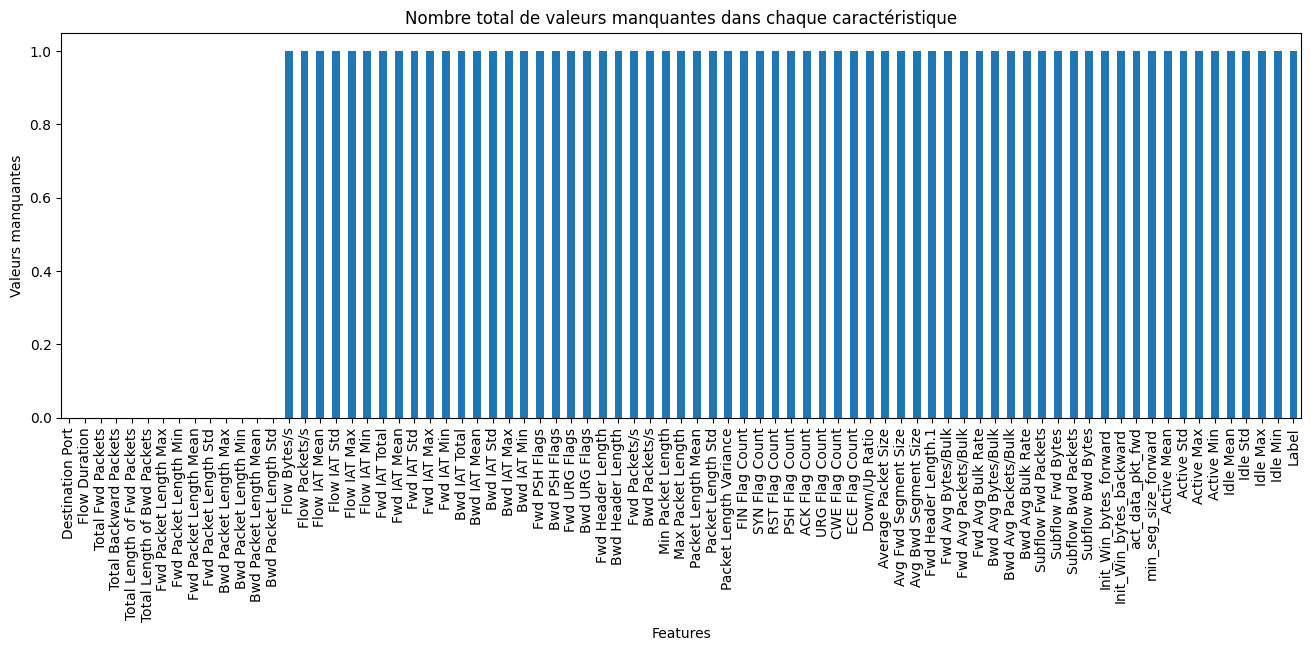

In [7]:
#le nombre total de valeurs manquantes pour chaque colonne d'un DataFrame.
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Comptage des valeurs nulles pour chaque colonne
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Valeurs manquantes")
    plt.title("Nombre total de valeurs manquantes dans chaque caractéristique")
    plt.show()

plotMissingValues(df)

In [8]:
data_f=df.dropna()

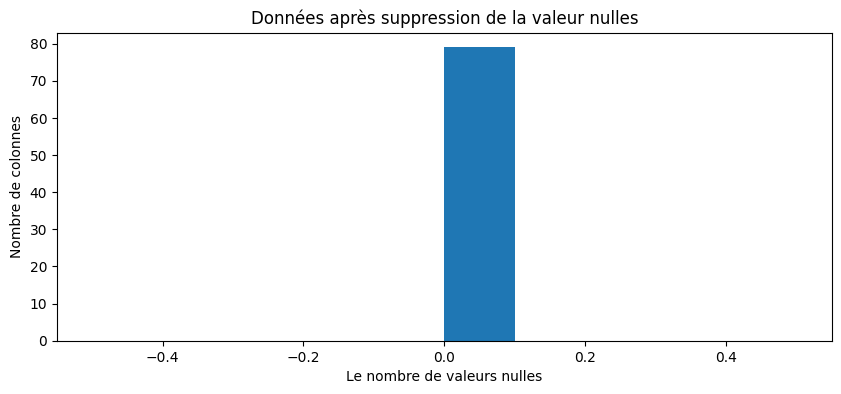

In [9]:
#Vérification des valeurs nulles dans l'ensemble de données.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Définir le titre et les étiquettes des axes
plt.title('Données après suppression de la valeur nulles')
plt.xlabel('Le nombre de valeurs nulles')
plt.ylabel('Nombre de colonnes')

# Show the plot
plt.show()

In [10]:
pd.set_option('use_inf_as_na', True)  # Traiter l'inf comme NaN
null_values=data_f.isnull().sum()  # Vérification des valeurs NaN

<ipython-input-10-edac7d2cd02e>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)  # Traiter l'inf comme NaN


In [11]:
# Connaître les types de données des colonnes

(data_f.dtypes=='object')

,0
Destination Port,False
Flow Duration,False
Total Fwd Packets,False
Total Backward Packets,False
Total Length of Fwd Packets,False
...,...
Idle Mean,False
Idle Std,False
Idle Max,False
Idle Min,False


In [12]:
# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1,'FTP-Patator':2,'PortScan':3,'DoS Hulk':4,'SSH-Patator':5,'DoS Slowhttptest':6,'DoS GoldenEye':7,'Web Attack � XSS':8,'DoS slowloris':9,  'Bot':10, 'Web Attack � Brute Force':11,'Web Attack � Sql Injection':12})


<ipython-input-12-0c6500733f98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1,'FTP-Patator':2,'PortScan':3,'DoS Hulk':4,'SSH-Patator':5,'DoS Slowhttptest':6,'DoS GoldenEye':7,'Web Attack � XSS':8,'DoS slowloris':9,  'Bot':10, 'Web Attack � Brute Force':11,'Web Attack � Sql Injection':12})


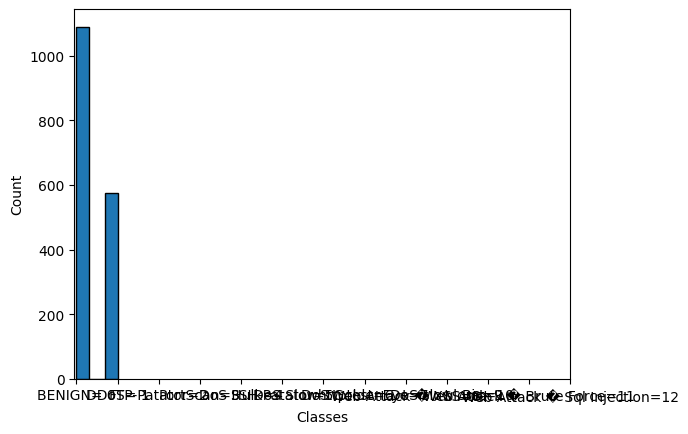

In [13]:
# Print the DataFrame

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11,12], labels=['BENIGN= 0', 'DDoS= 1','FTP-Patator=2','PortScan=3','DoS Hulk=4','SSH-Patator=5','DoS Slowhttptest=6','DoS GoldenEye=7','Web Attack � XSS=8','DoS slowloris=9',  'Bot=10', 'Web Attack � Brute Force=11','Web Attack � Sql Injection=12'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [14]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2972.000000,2.972000e+03,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,...,2971.000000,2971.000000,2.971000e+03,2.971000e+03,2.971000e+03,2.971000e+03,2.971000e+03,2.971000e+03,2.971000e+03,2.971000e+03
mean,5446.868439,1.785861e+07,4.320996,3.780956,296.567631,4076.843540,133.887954,10.089502,34.246207,45.547820,...,2.150118,26.842141,9.263341e+04,2.005386e+04,1.225528e+05,8.120824e+04,1.372213e+07,9.343892e+05,1.443850e+07,1.303411e+07
std,14937.875013,3.535239e+07,7.369092,8.516608,2275.252135,10697.225201,341.149623,55.959770,96.143609,116.113594,...,6.531639,7.115047,6.281286e+05,2.491903e+05,7.477430e+05,6.064424e+05,3.085386e+07,6.455207e+06,3.181816e+07,3.059158e+07
min,4.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,7.000000e+01,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,6.043400e+04,2.000000,2.000000,26.000000,102.000000,20.000000,0.000000,8.666667,0.000000,...,1.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,7.802151e+06,5.000000,5.000000,138.000000,11595.000000,58.000000,6.000000,45.031250,20.124612,...,2.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.046784e+06,0.000000e+00,5.046784e+06,5.038582e+06
max,65478.000000,1.199446e+08,241.000000,237.000000,96126.000000,326646.000000,8520.000000,1983.000000,2670.166667,2590.985698,...,239.000000,60.000000,7.015374e+06,6.659235e+06,9.418340e+06,7.015374e+06,1.190387e+08,6.400000e+07,1.190387e+08,1.190387e+08


In [15]:
df.duplicated().sum()

117

<ipython-input-16-03f42dd64bc8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f[col] = data_f[col].replace([np.inf, -np.inf], np.nan)


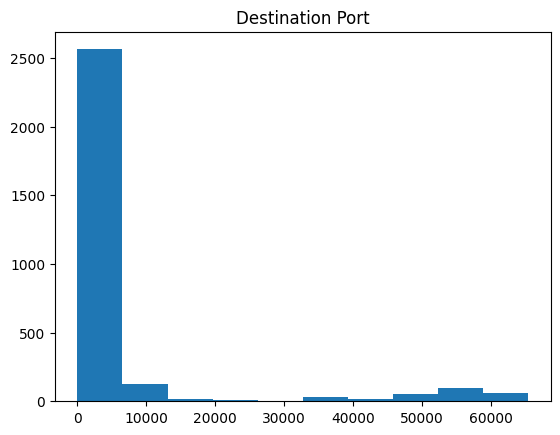

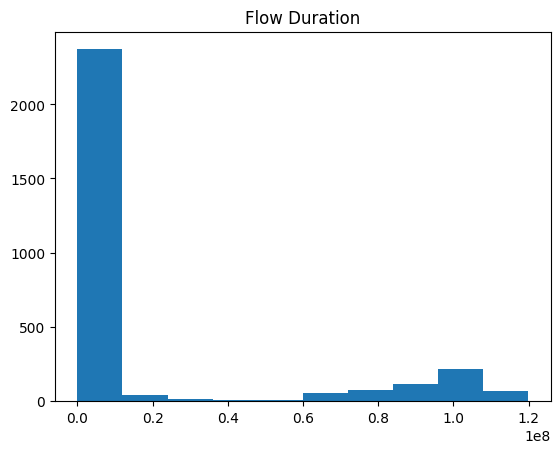

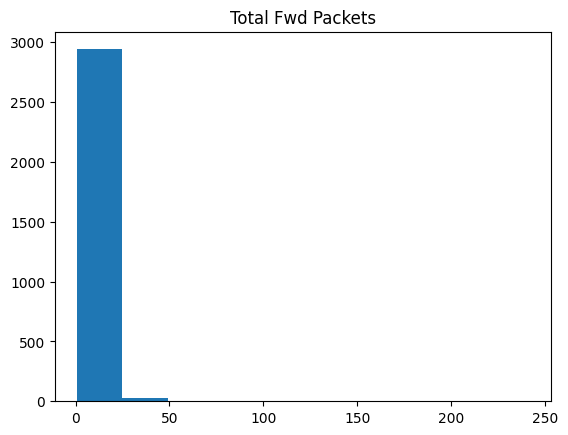

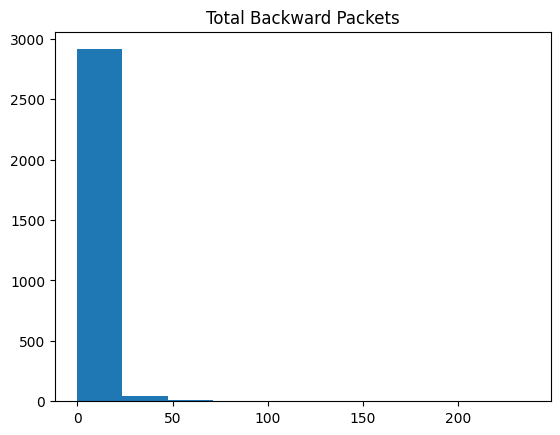

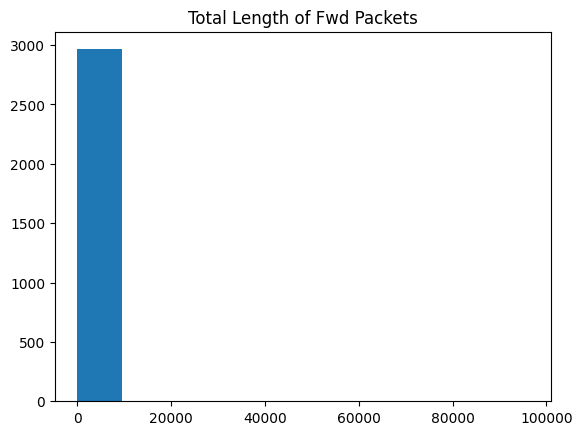

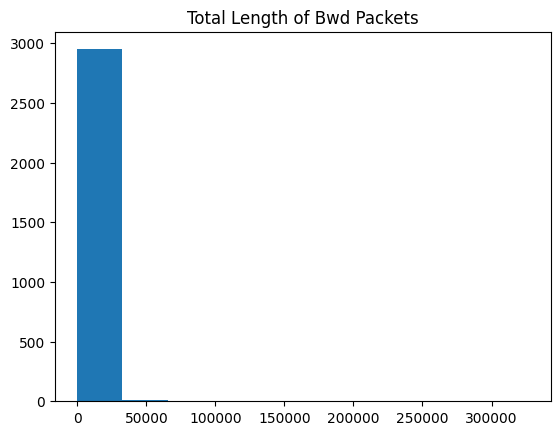

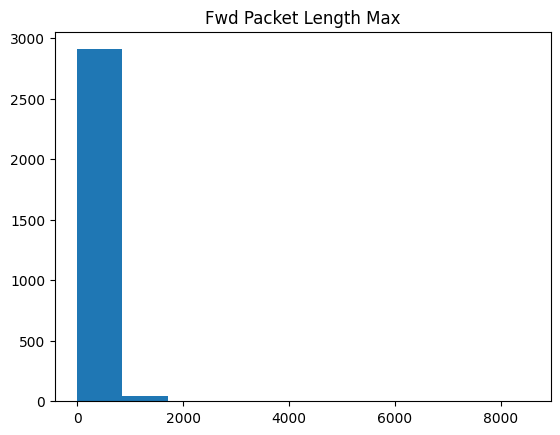

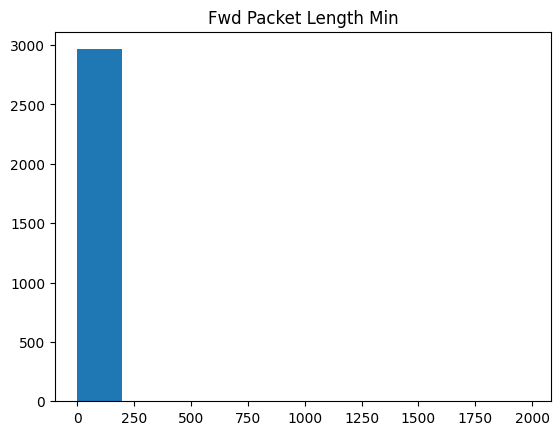

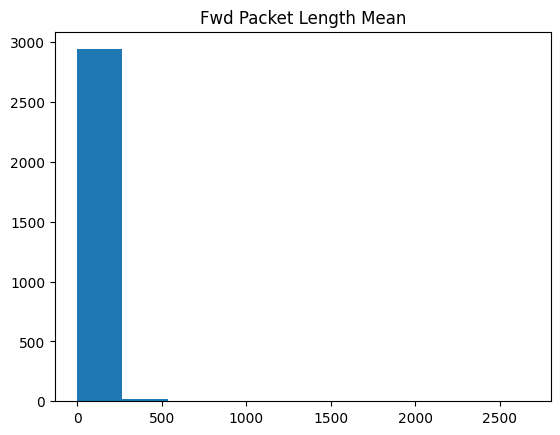

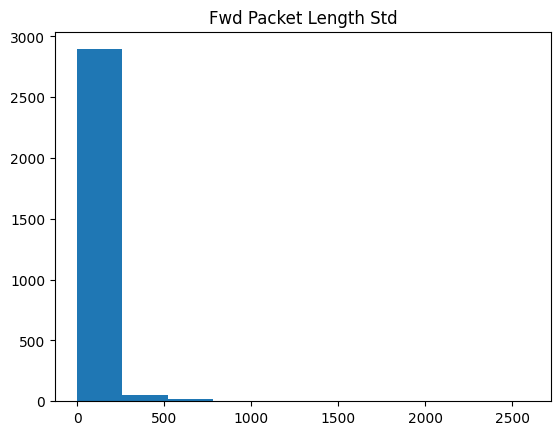

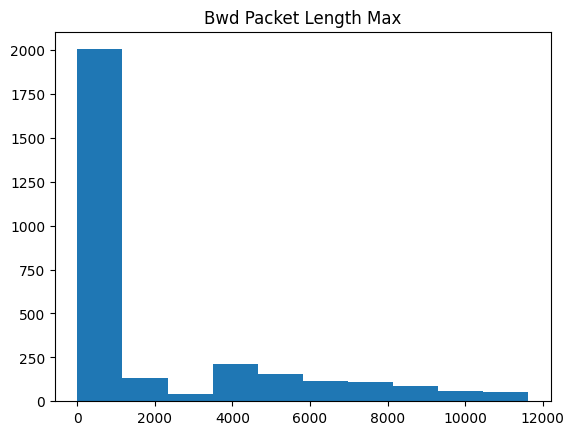

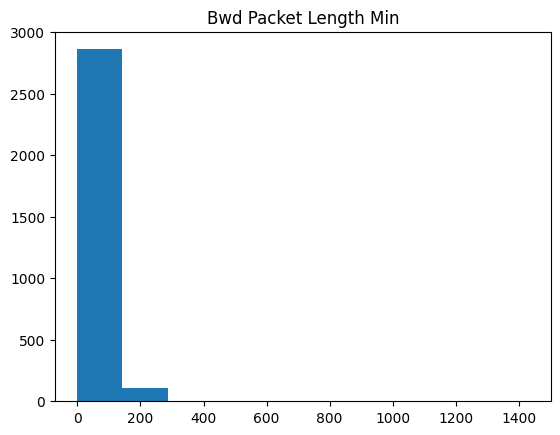

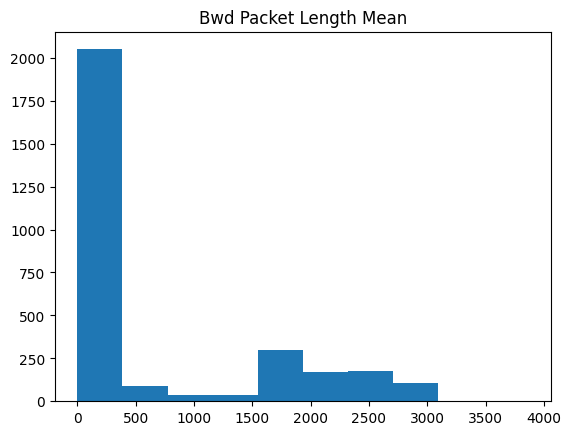

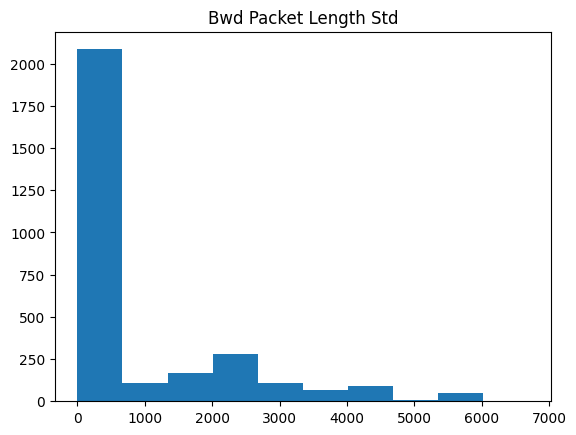

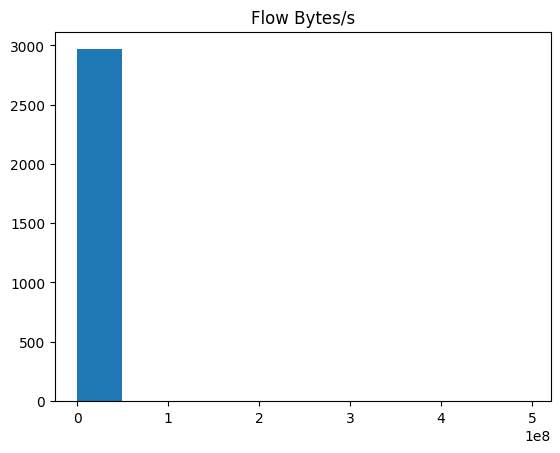

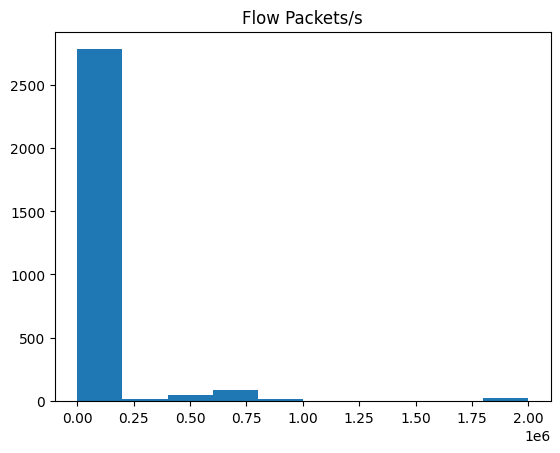

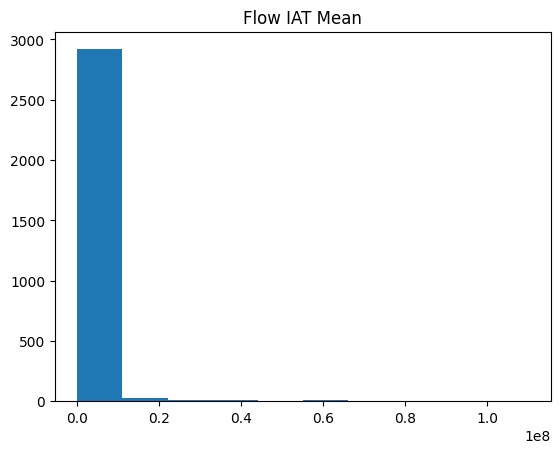

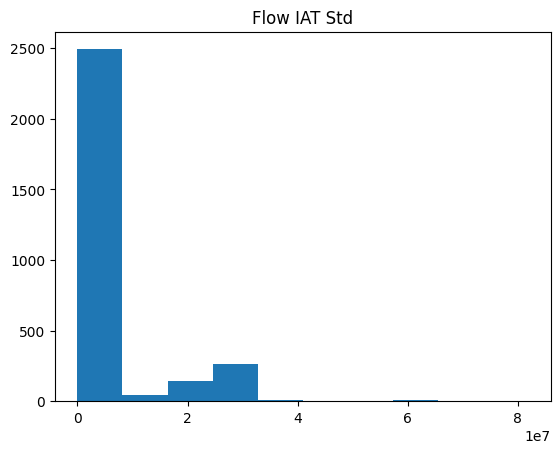

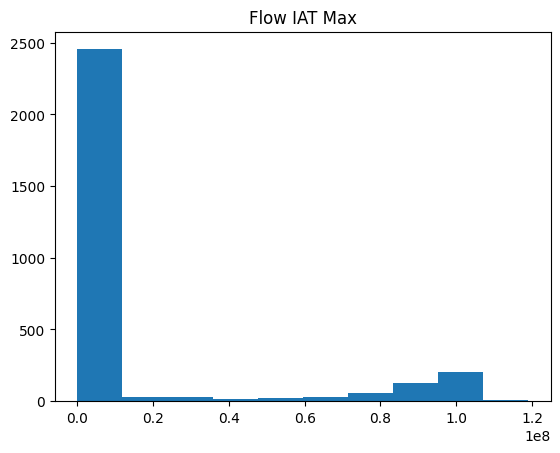

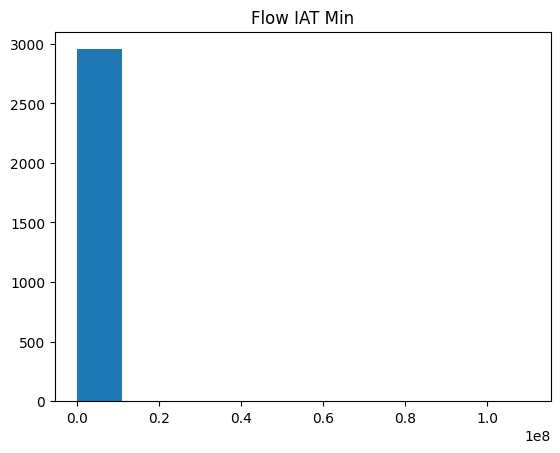

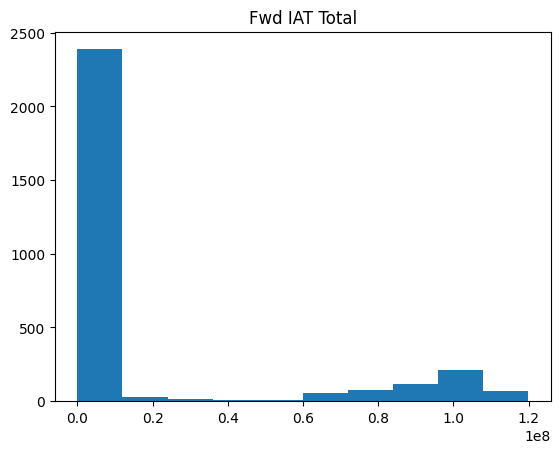

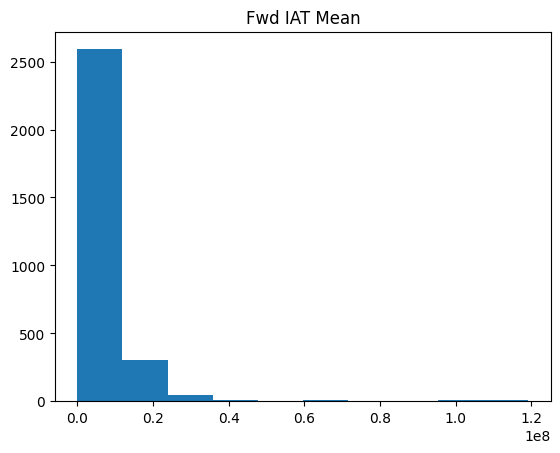

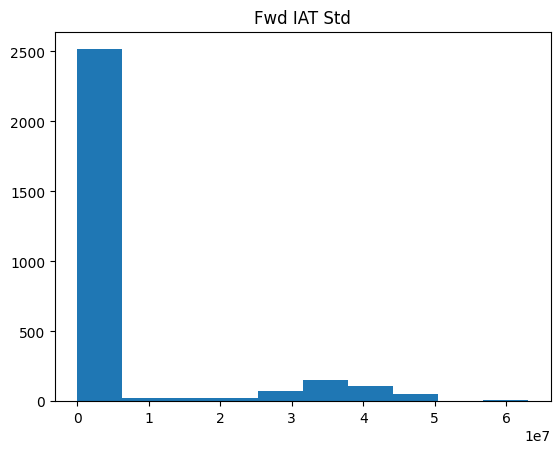

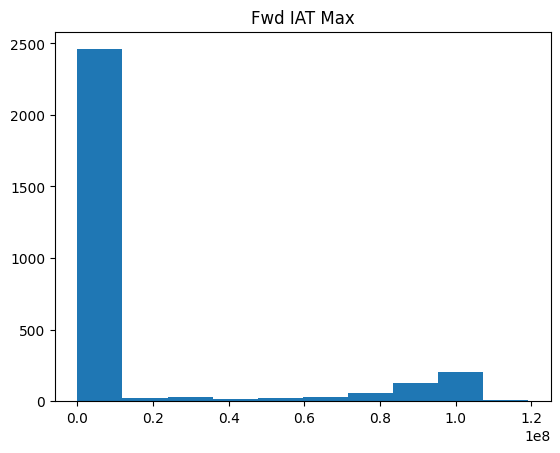

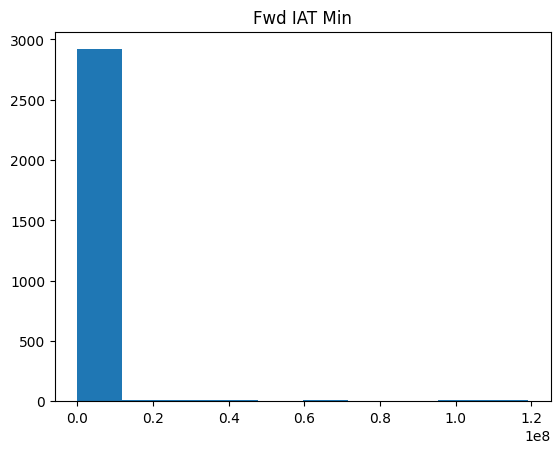

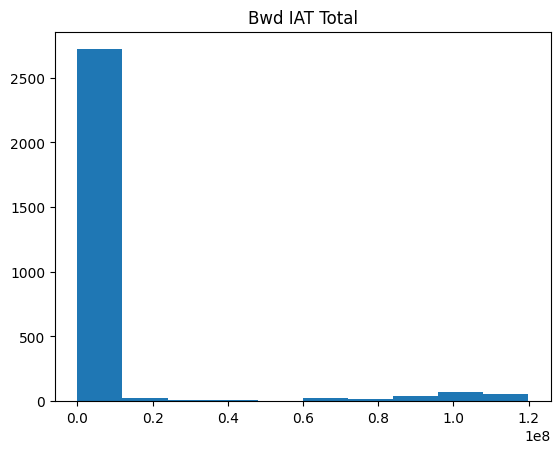

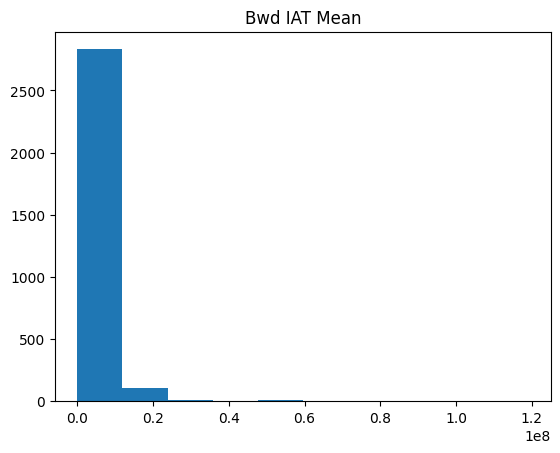

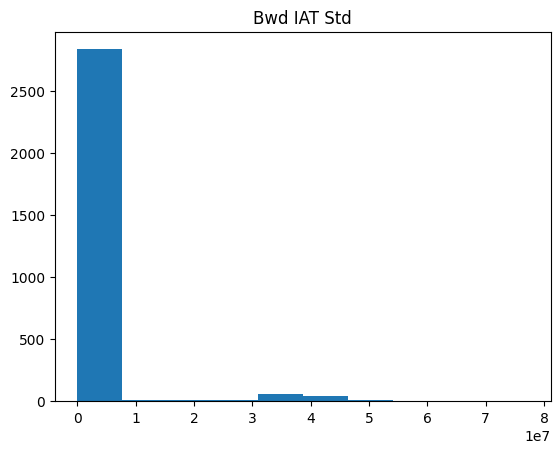

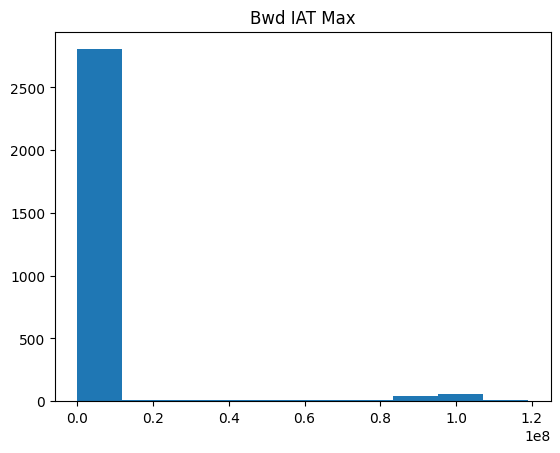

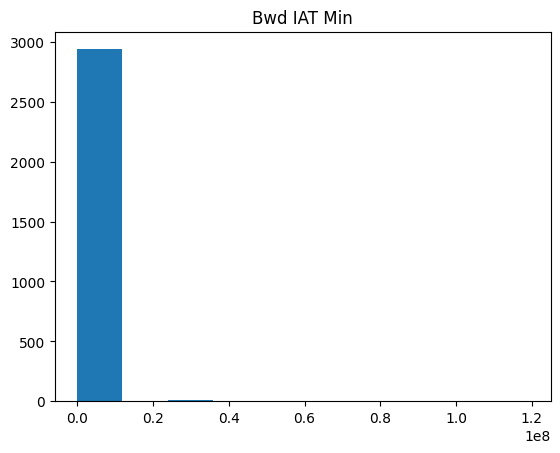

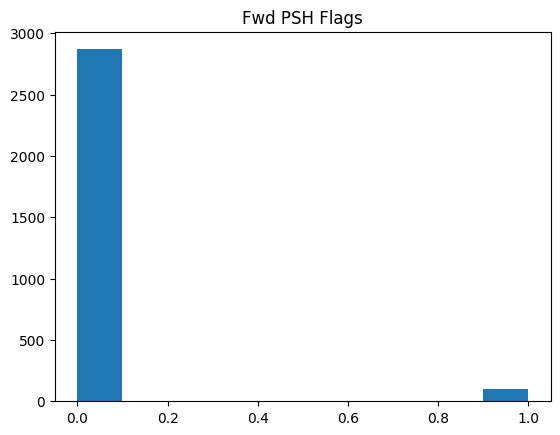

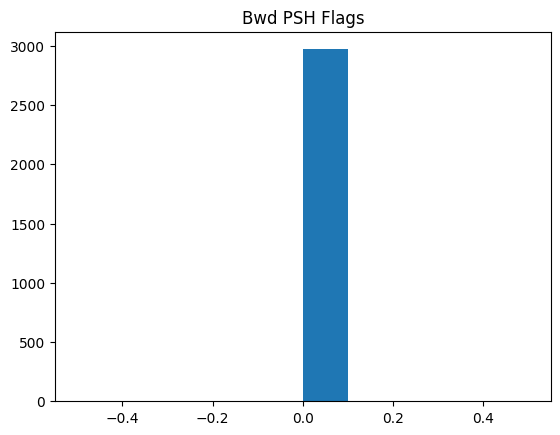

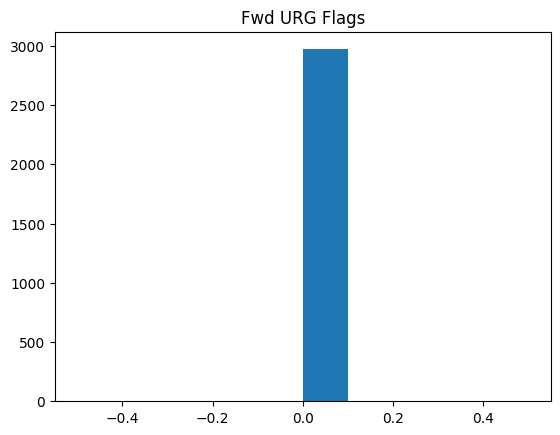

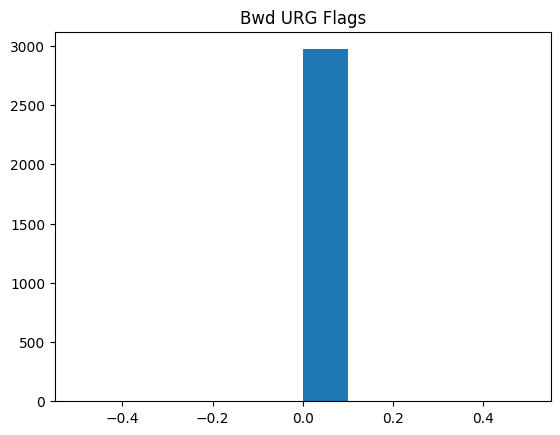

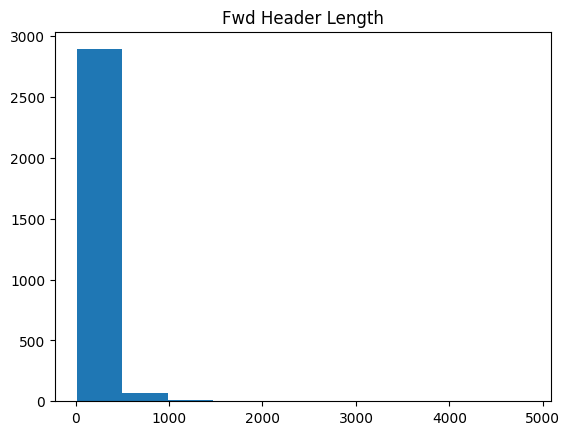

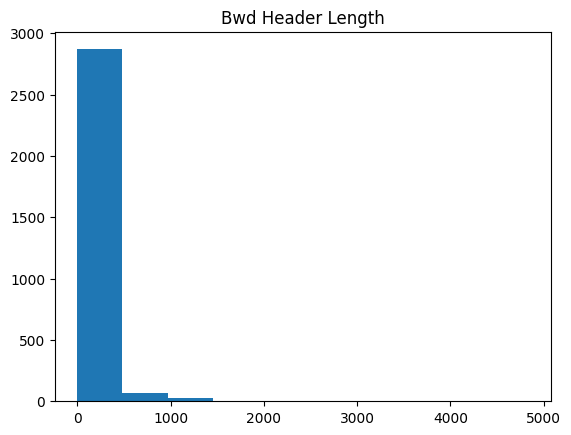

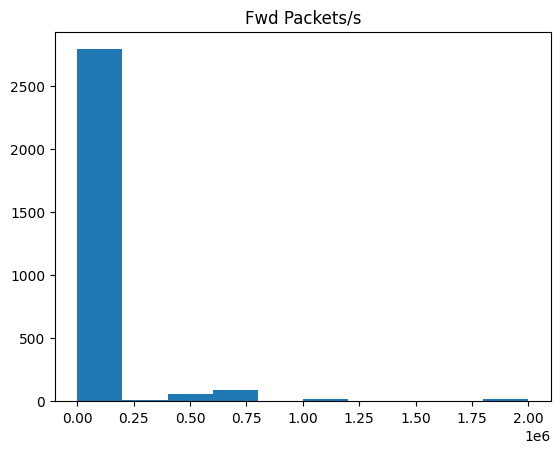

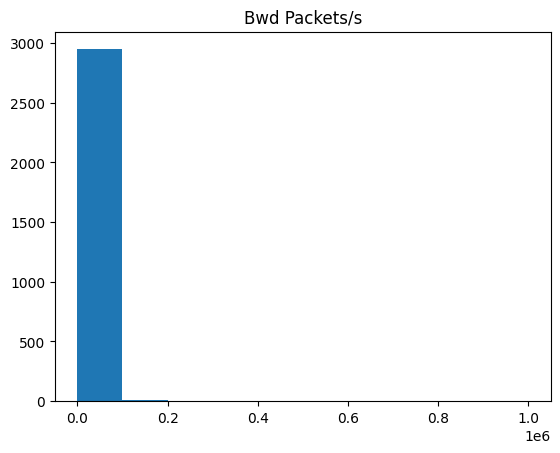

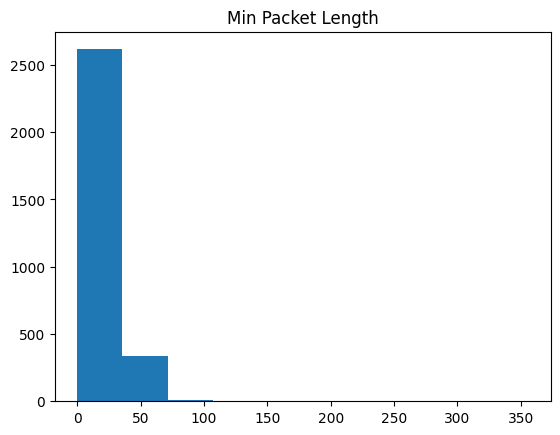

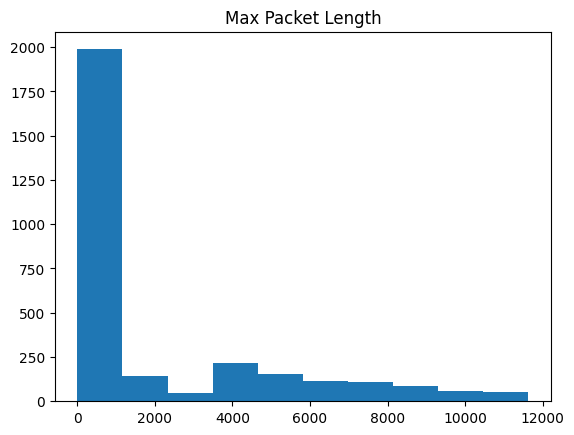

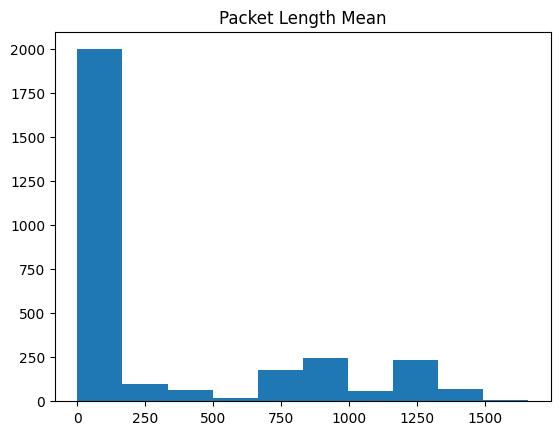

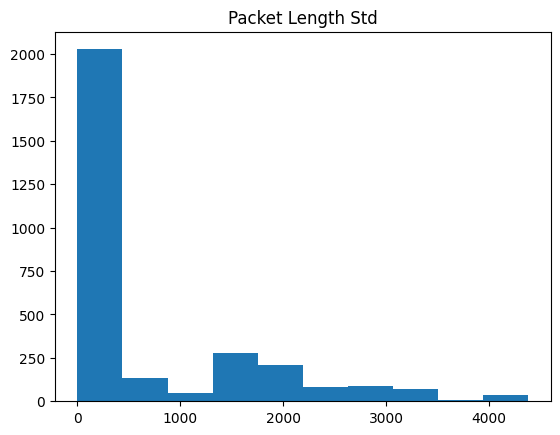

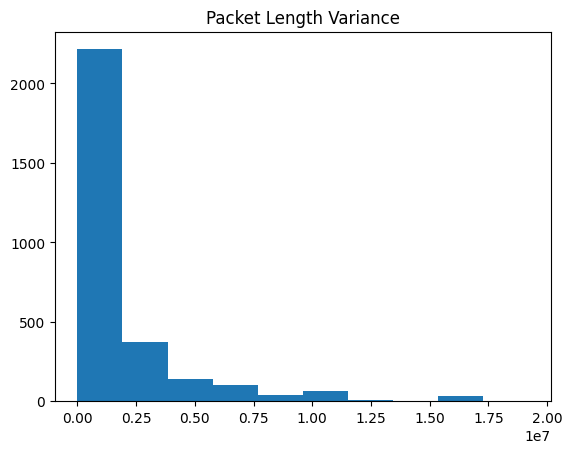

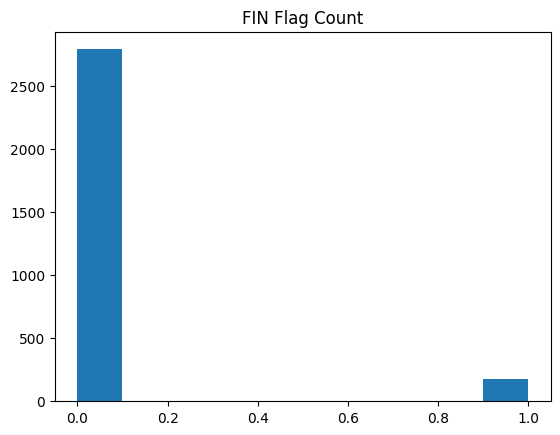

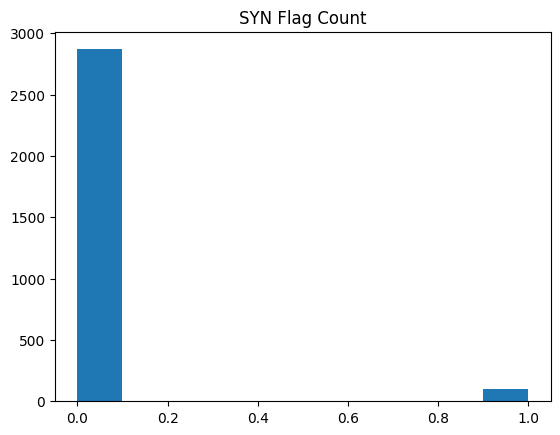

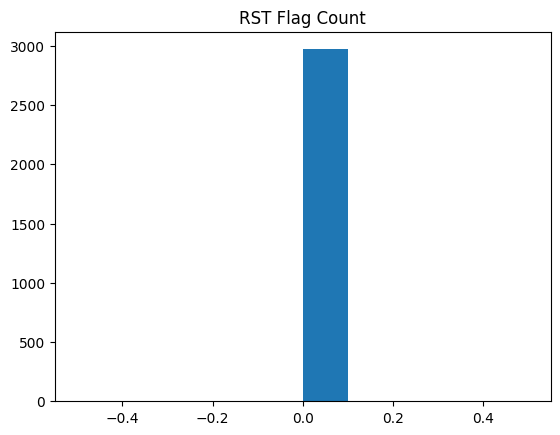

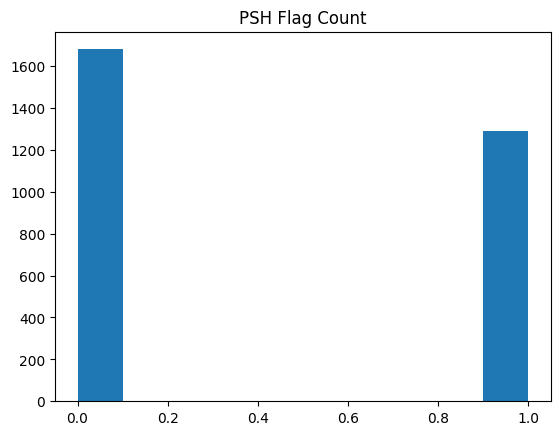

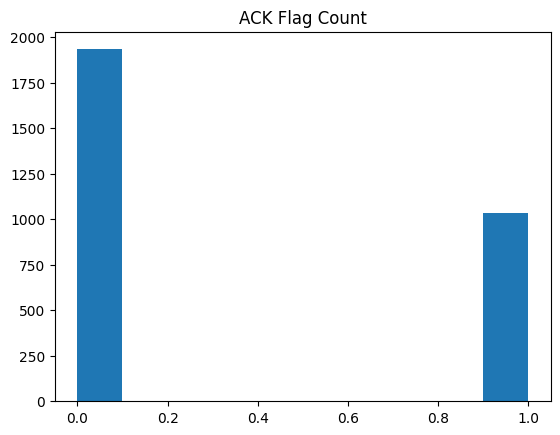

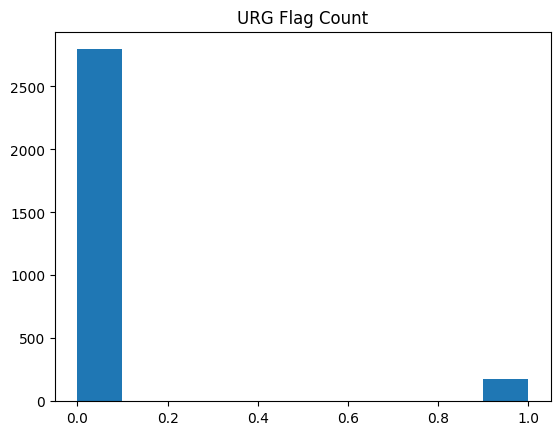

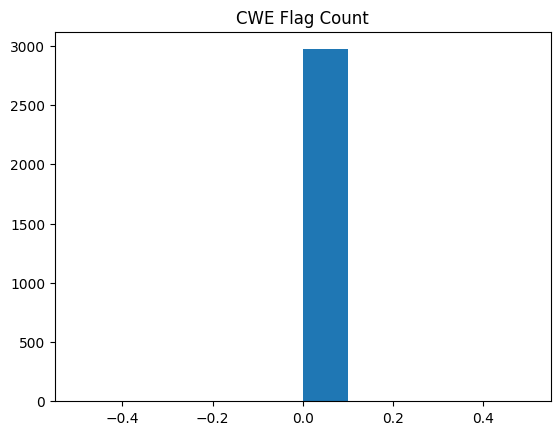

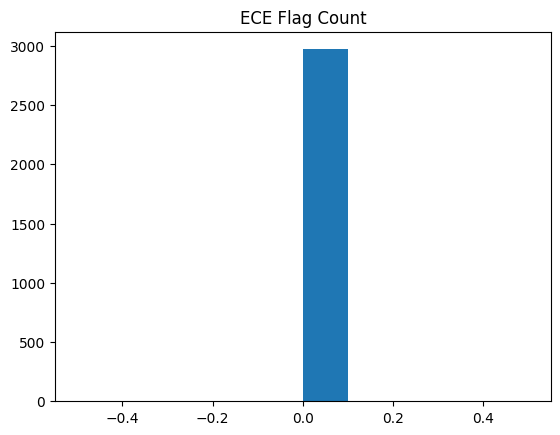

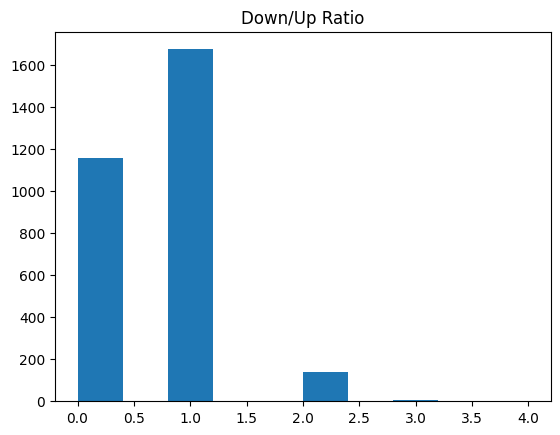

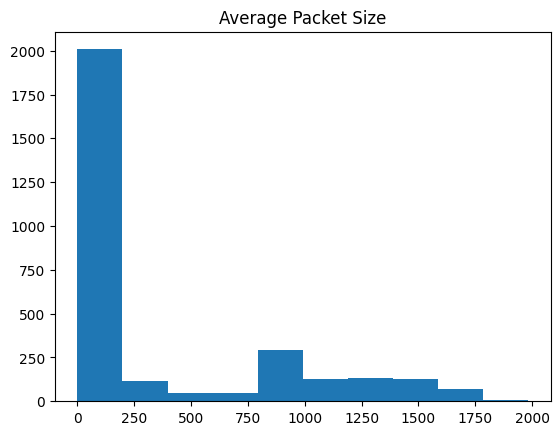

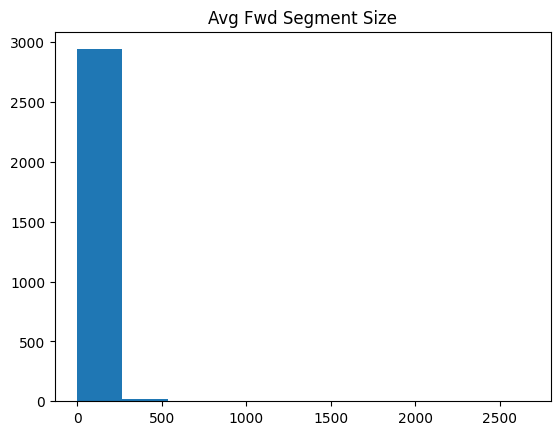

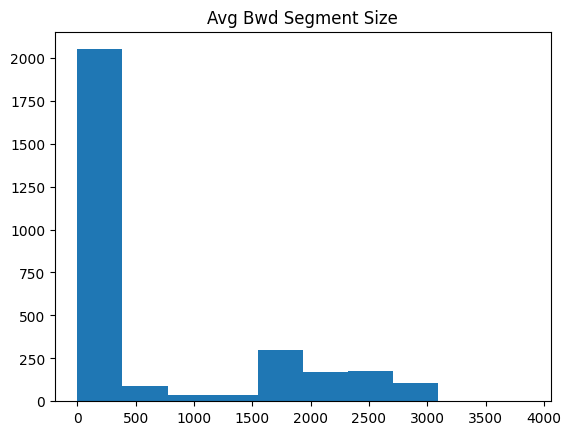

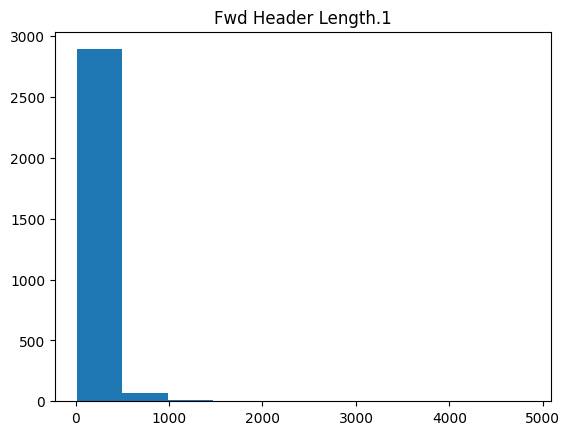

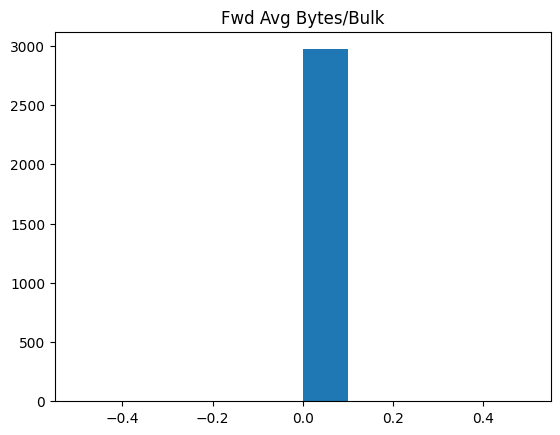

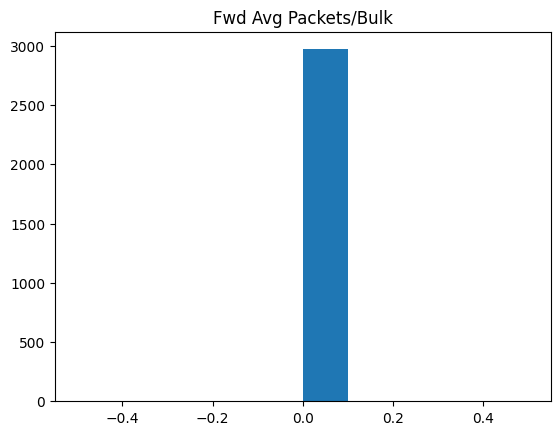

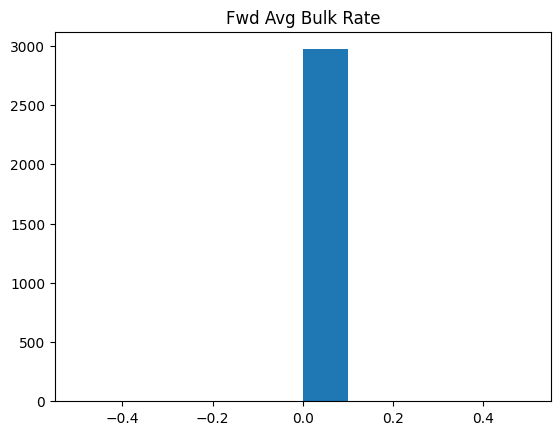

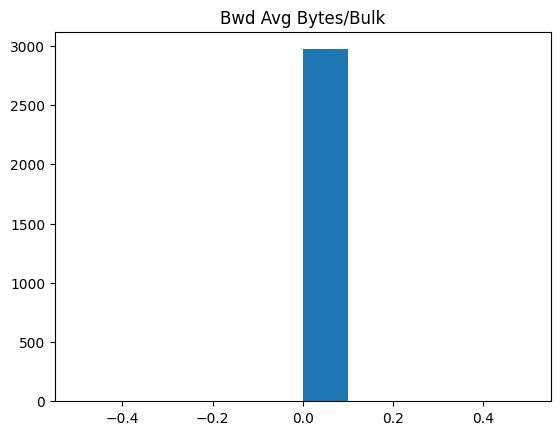

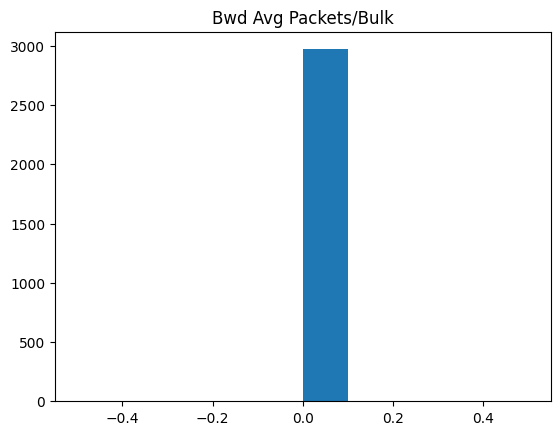

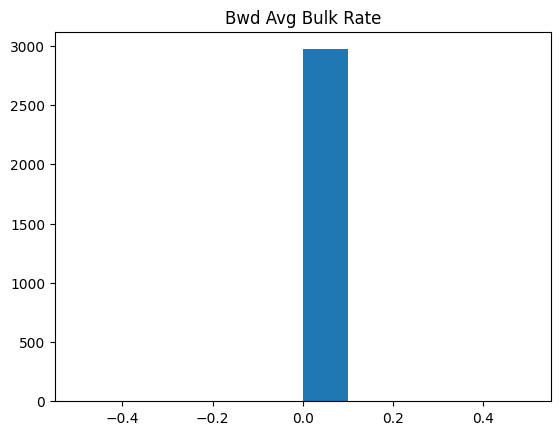

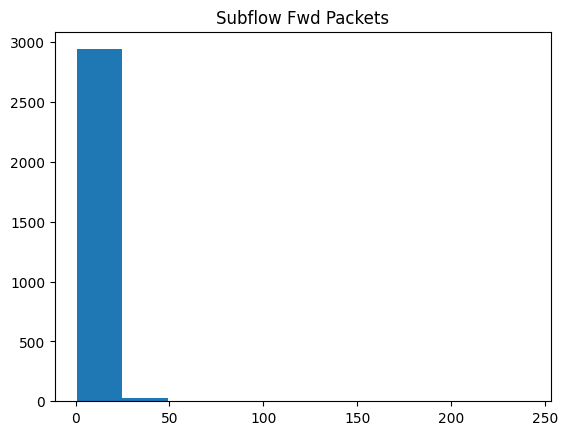

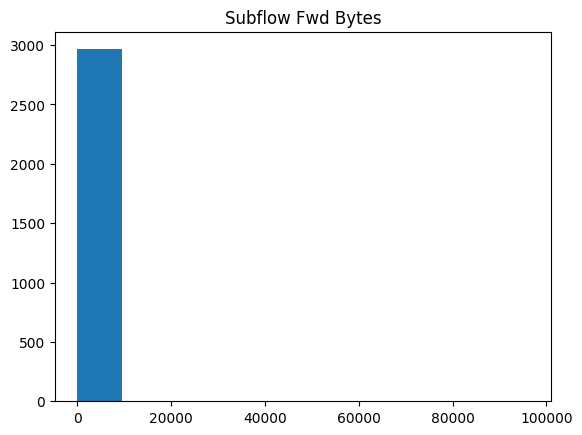

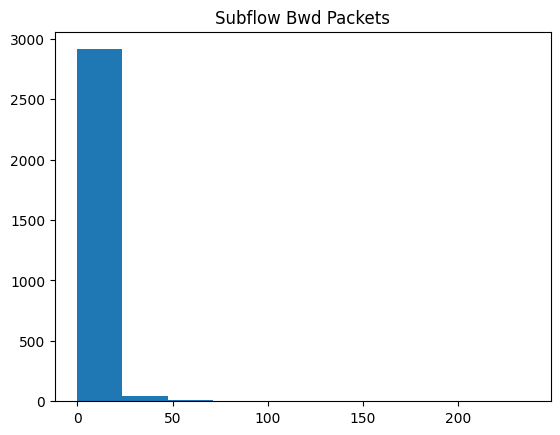

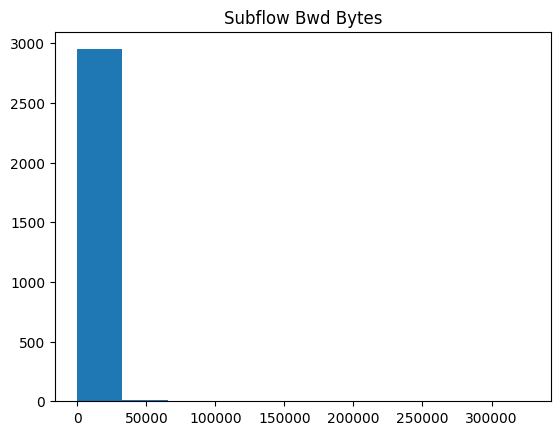

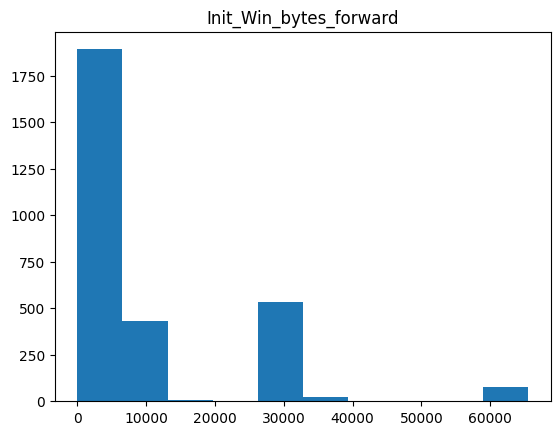

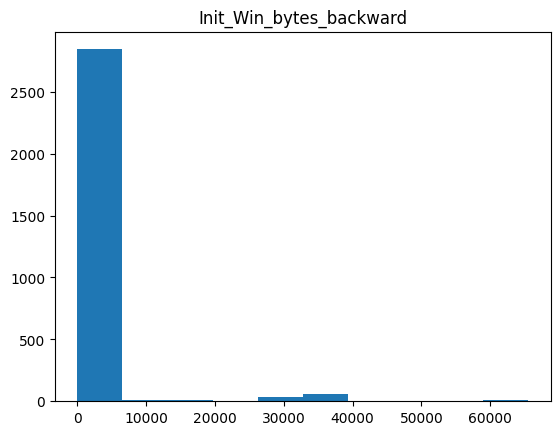

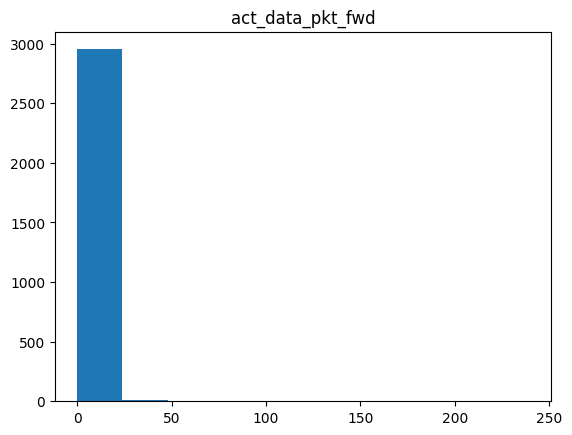

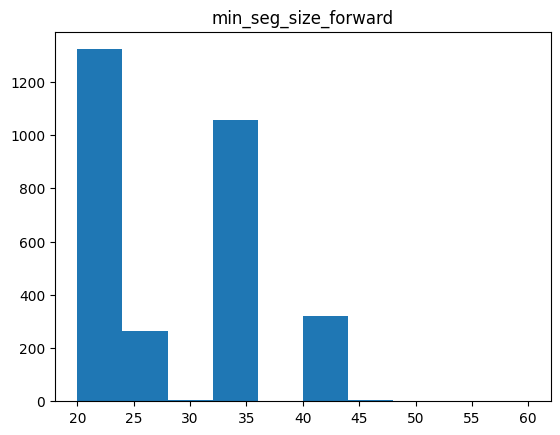

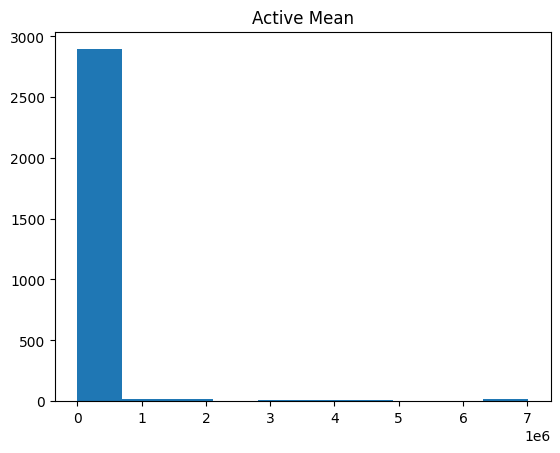

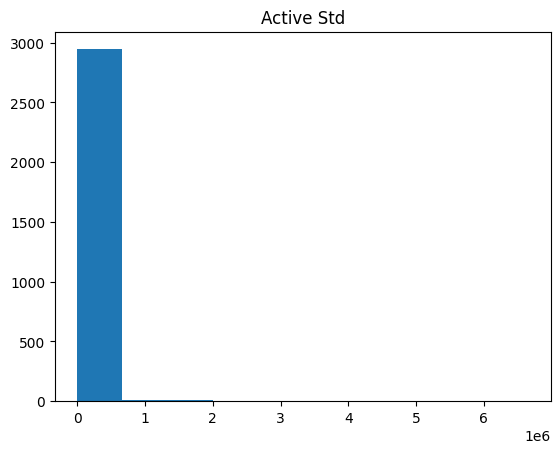

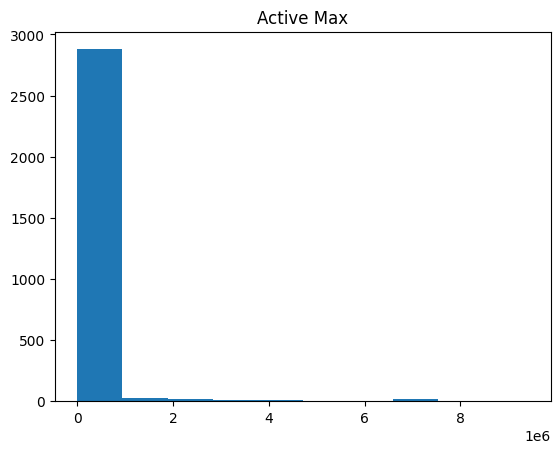

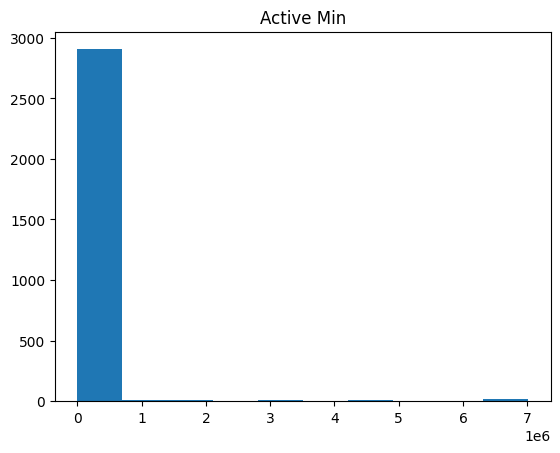

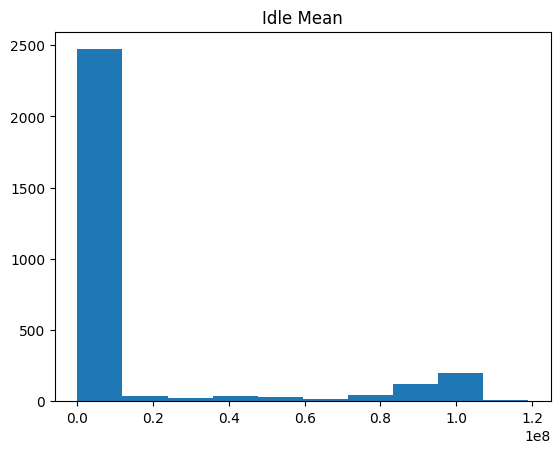

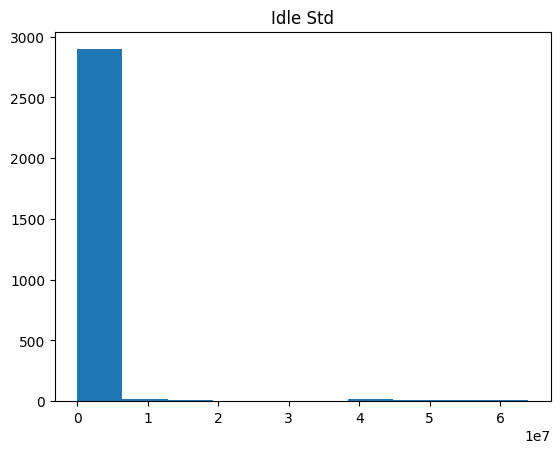

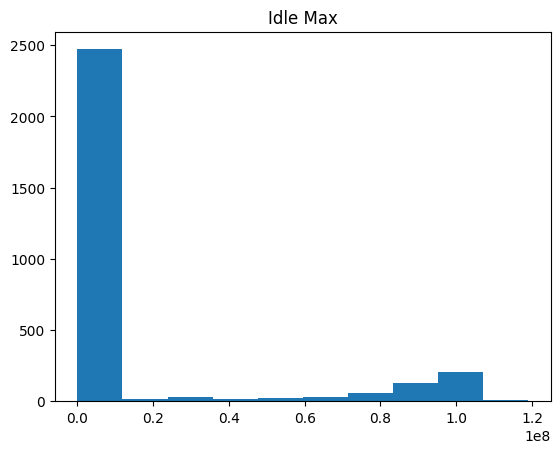

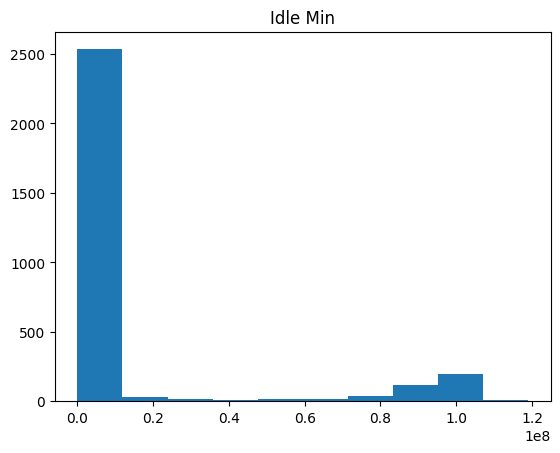

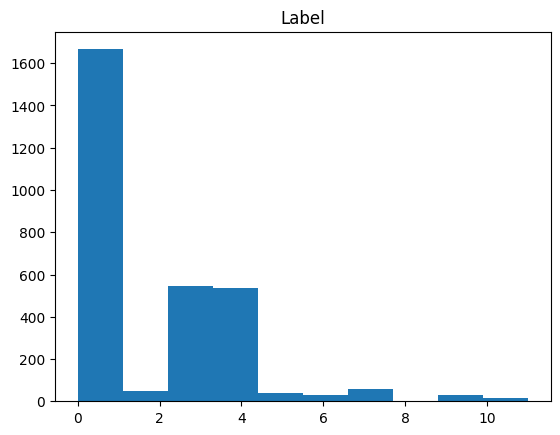

In [16]:
# Create a histogram plot for each feature
plt.figure(5)
for col in data_f.columns:
    # Replace infinite values with NaN
    data_f[col] = data_f[col].replace([np.inf, -np.inf], np.nan)

    # Drop NaN values for the current column before plotting
    values_to_plot = data_f[col].dropna()

    plt.hist(values_to_plot)
    plt.title(col)
    plt.show()

# Import libraries

In [18]:
!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import catboost as cbt # Now you can import catboost after installation
import xgboost as xgb
import time
from river import stream # Now you can import from the river module
from statistics import mode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [19]:
df.Label.value_counts()

,count
Label,
BENIGN,1090
DDoS,576
PortScan,545
DoS Hulk,536
DoS GoldenEye,56
FTP-Patator,49
SSH-Patator,40
DoS Slowhttptest,31
DoS slowloris,28


In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialiser le LabelEncoder
le = LabelEncoder()

# Encoder les labels de la colonne 'Label'
df['Label_encoded'] = le.fit_transform(df['Label'])

# Vérifier le type de la nouvelle colonne 'Label_encoded'
print("Type de la nouvelle colonne 'Label_encoded' :", df['Label_encoded'].dtype)

# Afficher les valeurs uniques de 'Label_encoded' pour vérifier la conversion
encoded_attack_types = df['Label_encoded'].unique()

# Afficher les attaques codées
print("\nTypes d'attaques après encodage en nombre :")
print(encoded_attack_types)

# Afficher la distribution des attaques encodées
print("\nDistribution des attaques après encodage en nombre:")
print(df['Label_encoded'].value_counts())


Type de la nouvelle colonne 'Label_encoded' : int64

Types d'attaques après encodage en nombre :
[ 0  7  8  4  2  9  5  3 11  6  1 10 12]

Distribution des attaques après encodage en nombre:
Label_encoded
0     1090
2      576
8      545
4      536
3       56
7       49
9       40
5       31
6       28
1       10
10       7
11       3
12       1
Name: count, dtype: int64


In [21]:
df.Label.value_counts()

,count
Label,
BENIGN,1090
DDoS,576
PortScan,545
DoS Hulk,536
DoS GoldenEye,56
FTP-Patator,49
SSH-Patator,40
DoS Slowhttptest,31
DoS slowloris,28


In [22]:
import pandas as pd

# Afficher les types d'attaques avant conversion
print("Types d'attaques avant conversion en nombre:")
print(df['Label'].unique())

# Convertir la colonne 'Label' en nombres
df['Label_numeric'] = df['Label'].astype('category').cat.codes

# Vérifier les types d'attaques après conversion en nombre
print("\nTypes d'attaques après conversion en nombre:")
print(df['Label_numeric'].unique())

# Afficher la distribution des attaques avec les valeurs numériques
print("\nDistribution des attaques après conversion en nombre:")
print(df['Label_numeric'].value_counts())


Types d'attaques avant conversion en nombre:
['BENIGN' 'FTP-Patator' 'PortScan' 'DoS Hulk' 'DDoS' 'SSH-Patator'
 'DoS Slowhttptest' 'DoS GoldenEye' 'Web Attack � XSS' 'DoS slowloris'
 'Bot' 'Web Attack � Brute Force' nan]

Types d'attaques après conversion en nombre:
[ 0  7  8  4  2  9  5  3 11  6  1 10 -1]

Distribution des attaques après conversion en nombre:
Label_numeric
 0     1090
 2      576
 8      545
 4      536
 3       56
 7       49
 9       40
 5       31
 6       28
 1       10
 10       7
 11       3
-1        1
Name: count, dtype: int64


In [23]:
df.Label.value_counts()


,count
Label,
BENIGN,1090
DDoS,576
PortScan,545
DoS Hulk,536
DoS GoldenEye,56
FTP-Patator,49
SSH-Patator,40
DoS Slowhttptest,31
DoS slowloris,28


# Split train set and test set

In [24]:
X = df.drop(['Label'],axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0) #shuffle=False

In [25]:
pd.Series(y_train).value_counts()

,count
Label,
BENIGN,863
DDoS,469
PortScan,445
DoS Hulk,424
DoS GoldenEye,45
FTP-Patator,37
SSH-Patator,31
DoS Slowhttptest,25
DoS slowloris,21


In [26]:
type_label = df['Label'].dtype
print(type_label)

object


In [27]:
import pandas as pd

# Convertir la colonne 'Label' en type int
df['Label'] = df['Label'].astype('category').cat.codes

# Vérifier les types d'attaques avec leurs correspondances numériques
attack_mapping = df['Label'].value_counts().to_dict()

# Afficher les attaques avec les valeurs numériques
print("Mapping des attaques avec leurs valeurs numériques :")
print(attack_mapping)

# Vérifier le type de la colonne 'Label' après conversion
type_label = df['Label'].dtype
print("\nType de la colonne 'Label' après conversion:", type_label)


Mapping des attaques avec leurs valeurs numériques :
{0: 1090, 2: 576, 8: 545, 4: 536, 3: 56, 7: 49, 9: 40, 5: 31, 6: 28, 1: 10, 10: 7, 11: 3, -1: 1}

Type de la colonne 'Label' après conversion: int8


In [28]:
pd.Series(y_train).value_counts()


,count
Label,
BENIGN,863
DDoS,469
PortScan,445
DoS Hulk,424
DoS GoldenEye,45
FTP-Patator,37
SSH-Patator,31
DoS Slowhttptest,25
DoS slowloris,21


# SMOTE to solve class-imbalance

In [29]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={2:1000,4:1000})

In [30]:
# Reset indices of both X_train and y_train before dropping NaN values
X_train.reset_index(drop=True, inplace=True)
y_train = pd.Series(y_train).reset_index(drop=True) # Convert y_train to a Series before resetting index

# Now drop NaN values from X_train and select corresponding y_train values
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Update corresponding labels as well. # Select the corresponding y_train values using the updated index of X_train

In [31]:
X_train.fillna(0, inplace=True)


In [33]:
from sklearn.impute import SimpleImputer

# Créer l'objet d'imputation avec la stratégie 'mean' (remplace les NaN par la moyenne)
imputer = SimpleImputer(strategy='mean')

# Appliquer l'imputation aux données
X_train_imputed = imputer.fit_transform(X_train)

# Appliquer SMOTE après l'imputation
from imblearn.over_sampling import SMOTE

# Get the current counts for class 2 and class 4
class_2_count = y_train.value_counts().get(2, 0)  # Get count of class 2, default to 0 if not found

<ipython-input-33-f667597bd2a8>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  class_2_count = y_train.value_counts().get(2, 0)  # Get count of class 2, default to 0 if not found


In [34]:
pd.Series(y_train).value_counts()

,count
Label,
BENIGN,862
DDoS,469
PortScan,444
DoS Hulk,424
DoS GoldenEye,45
FTP-Patator,37
SSH-Patator,31
DoS Slowhttptest,25
DoS slowloris,21


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11090
[LightGBM] [Info] Number of data points in the train set: 2374, number of used features: 68
[LightGBM] [Info] Start training from score -1.013076
[LightGBM] [Info] Start training from score -5.692890
[LightGBM] [Info] Start training from score -1.621729
[LightGBM] [Info] Start training from score -3.965669
[LightGBM] [Info] Start training from score -1.722598
[LightGBM] [Info] Start training from score -4.553456
[LightGBM] [Info] Start training from score -4.727809
[LightGBM] [Info] Start training from score -4.161414
[LightGBM] [Info] Start training from score -1.676507
[LightGBM] [Info] Start training from score -4.338344
[LightGBM] [Info] Start tra

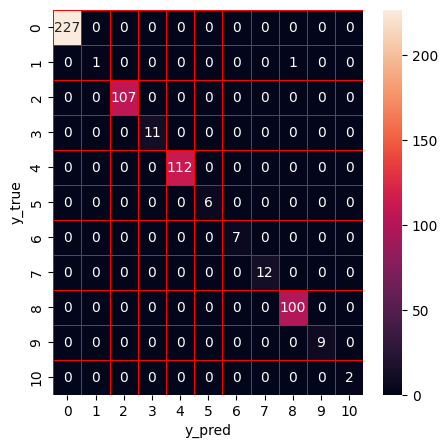

In [35]:
# Convert the labels in both y_test and y_train to numeric before fitting the model
import pandas as pd

# Assuming y_test and y_train are pandas Series
y_test = y_test.astype('category').cat.codes
y_train = y_train.astype('category').cat.codes

# Ensure X_train is reset indices, NaN dropped, and replaced with 0 (as per cells 55 and 56)

# Ensure X_train is imputed and resampled using SMOTE (as per cell 58)

# Fit the model and evaluate performance
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

lg = lgb.LGBMClassifier()
lg.fit(X_train, y_train) # X_train here might have been modified based on the analysis of previous code.
y_pred = lg.predict(X_test)

# Print and plot evaluation metrics
print(classification_report(y_test, y_pred))
print("Accuracy of LightGBM: " + str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: " + str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: " + str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: " + str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: " + str(f1_score(y_test, y_pred, average=None)))
lg_f1 = f1_score(y_test, y_pred, average=None)

cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Machine Learning (ML) model training

**Training three base learners: LightGBM, XGBoost, CatBoost**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       107
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00       112
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00       100
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         2

    accuracy                           1.00       595
   macro avg       1.00      1.00      1.00       595
weighted avg       1.00      1.00      1.00       595

Accuracy of XGBoost: 1.0
Precision of XGBoost: 1.0
Recall of XGBoost: 1.0
Average F1 of XGBoost: 1.0
F1 of XGBoost for each type of attack: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


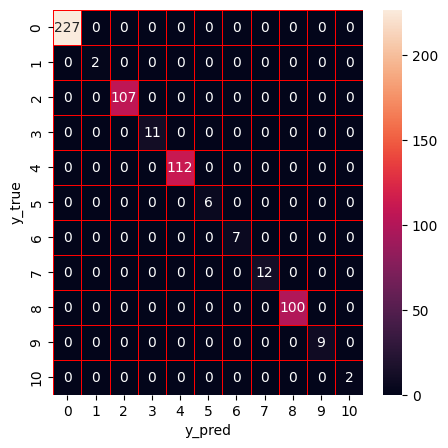

CPU times: user 2.04 s, sys: 133 ms, total: 2.17 s
Wall time: 1.37 s


In [36]:
%%time
# Train the XGBoost algorithm
import xgboost as xgb
xg = xgb.XGBClassifier()

X_train_x = X_train.values
X_test_x = X_test.values

xg.fit(X_train_x, y_train)

y_pred = xg.predict(X_test_x)
print(classification_report(y_test,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
xg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00       107
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00       112
           5       1.00      1.00      1.00         6
           6       0.88      1.00      0.93         7
           7       1.00      1.00      1.00        12
           8       1.00      0.99      0.99       100
           9       0.90      1.00      0.95         9
          10       1.00      0.50      0.67         2

    accuracy                           1.00       595
   macro avg       0.98      0.95      0.96       595
weighted avg       1.00      1.00      1.00       595

Accuracy of CatBoost: 0.9966386554621849
Precision of CatBoost: 0.9970168067226891
Recall of CatBoost: 0.9966386554621849
Average F1 of CatBoost: 0.9964545712492877
F1 of CatBoost for eac

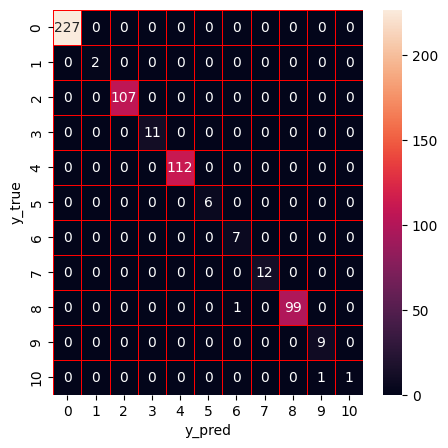

CPU times: user 3min 20s, sys: 1.43 s, total: 3min 21s
Wall time: 2min 19s


In [37]:
%%time
# Train the CatBoost algorithm
import catboost as cbt
cb = cbt.CatBoostClassifier(verbose=0,boosting_type='Plain')
#cb = cbt.CatBoostClassifier()

cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of CatBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of CatBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of CatBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of CatBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of CatBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
cb_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Proposed ensemble model: Leader Class and Confidence Decision Ensemble (LCCDE)

**Find the best-performing (leading) model for each type of attack among the three ML models**

In [38]:
# Leading model list for each class
model=[]
for i in range(len(lg_f1)):
    if max(lg_f1[i],xg_f1[i],cb_f1[i]) == lg_f1[i]:
        model.append(lg)
    elif max(lg_f1[i],xg_f1[i],cb_f1[i]) == xg_f1[i]:
        model.append(xg)
    else:
        model.append(cb)

In [39]:
model

[LGBMClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='multi:softprob', ...),
 LGBMClassifier(),
 LGBMClassifier(),
 LGBMClassifier(),
 LGBMClassifier(),
 LGBMClassifier(),
 LGBMClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_b

# LCCDE Prediction

In [40]:
def LCCDE(X_test, y_test, m1, m2, m3):
    i = 0
    t = []
    m = []
    yt = []
    yp = []
    l = []
    pred_l = []
    pro_l = []

    # For each class (normal or a type of attack), find the leader model
    for xi, yi in stream.iter_pandas(X_test, y_test):

        xi2=np.array(list(xi.values()))
        y_pred1 = m1.predict(xi2.reshape(1, -1))      # model 1 (LightGBM) makes a prediction on text sample xi
        y_pred1 = int(y_pred1[0])
        y_pred2 = m2.predict(xi2.reshape(1, -1))      # model 2 (XGBoost) makes a prediction on text sample xi
        y_pred2 = int(y_pred2[0])
        y_pred3 = m3.predict(xi2.reshape(1, -1))      # model 3 (Catboost) makes a prediction on text sample xi
        y_pred3 = int(y_pred3[0])

        p1 = m1.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 1
        p2 = m2.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 2
        p3 = m3.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 3

        # Find the highest prediction probability among all classes for each ML model
        y_pred_p1 = np.max(p1)
        y_pred_p2 = np.max(p2)
        y_pred_p3 = np.max(p3)

        if y_pred1 == y_pred2 == y_pred3: # If the predicted classes of all the three models are the same
            y_pred = y_pred1 # Use this predicted class as the final predicted class

        elif y_pred1 != y_pred2 != y_pred3: # If the predicted classes of all the three models are different
            # For each prediction model, check if the predicted class’s original ML model is the same as its leader model
            if model[y_pred1]==m1: # If they are the same and the leading model is model 1 (LightGBM)
                l.append(m1)
                pred_l.append(y_pred1) # Save the predicted class
                pro_l.append(y_pred_p1) # Save the confidence

            if model[y_pred2]==m2: # If they are the same and the leading model is model 2 (XGBoost)
                l.append(m2)
                pred_l.append(y_pred2)
                pro_l.append(y_pred_p2)

            if model[y_pred3]==m3: # If they are the same and the leading model is model 3 (CatBoost)
                l.append(m3)
                pred_l.append(y_pred3)
                pro_l.append(y_pred_p3)

            if len(l)==0: # Avoid empty probability list
                pro_l=[y_pred_p1,y_pred_p2,y_pred_p3]

            elif len(l)==1: # If only one pair of the original model and the leader model for each predicted class is the same
                y_pred=pred_l[0] # Use the predicted class of the leader model as the final prediction class

            else: # If no pair or multiple pairs of the original prediction model and the leader model for each predicted class are the same
                max_p = max(pro_l) # Find the highest confidence

                # Use the predicted class with the highest confidence as the final prediction class
                if max_p == y_pred_p1:
                    y_pred = y_pred1
                elif max_p == y_pred_p2:
                    y_pred = y_pred2
                else:
                    y_pred = y_pred3

        else: # If two predicted classes are the same and the other one is different
            n = mode([y_pred1,y_pred2,y_pred3]) # Find the predicted class with the majority vote
            y_pred = model[n].predict(xi2.reshape(1, -1)) # Use the predicted class of the leader model as the final prediction class
            y_pred = int(y_pred[0])

        yt.append(yi)
        yp.append(y_pred) # Save the predicted classes for all tested samples
    return yt, yp

In [41]:
%%time
# Implementing LCCDE
yt, yp = LCCDE(X_test, y_test, m1 = lg, m2 = xg, m3 = cb)

<ipython-input-40-6ddb813996d5>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred3 = int(y_pred3[0])
<ipython-input-40-6ddb813996d5>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred3 = int(y_pred3[0])
<ipython-input-40-6ddb813996d5>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred3 = int(y_pred3[0])
<ipython-input-40-6ddb813996d5>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future.

CPU times: user 13.5 s, sys: 292 ms, total: 13.8 s
Wall time: 15.6 s


<ipython-input-40-6ddb813996d5>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred3 = int(y_pred3[0])
<ipython-input-40-6ddb813996d5>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred3 = int(y_pred3[0])
<ipython-input-40-6ddb813996d5>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred3 = int(y_pred3[0])
<ipython-input-40-6ddb813996d5>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future.

In [42]:
# The performance of the proposed lCCDE model
print("Accuracy of LCCDE: "+ str(accuracy_score(yt, yp)))
print("Precision of LCCDE: "+ str(precision_score(yt, yp, average='weighted')))
print("Recall of LCCDE: "+ str(recall_score(yt, yp, average='weighted')))
print("Average F1 of LCCDE: "+ str(f1_score(yt, yp, average='weighted')))
print("F1 of LCCDE for each type of attack: "+ str(f1_score(yt, yp, average=None)))

Accuracy of LCCDE: 1.0
Precision of LCCDE: 1.0
Recall of LCCDE: 1.0
Average F1 of LCCDE: 1.0
F1 of LCCDE for each type of attack: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [43]:
# Comparison: The F1-scores for each base model
print("F1 of LightGBM for each type of attack: "+ str(lg_f1))
print("F1 of XGBoost for each type of attack: "+ str(xg_f1))
print("F1 of CatBoost for each type of attack: "+ str(cb_f1))

F1 of LightGBM for each type of attack: [1.         0.66666667 1.         1.         1.         1.
 1.         1.         0.99502488 1.         1.        ]
F1 of XGBoost for each type of attack: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
F1 of CatBoost for each type of attack: [1.         1.         1.         1.         1.         1.
 0.93333333 1.         0.99497487 0.94736842 0.66666667]
